<a href="https://colab.research.google.com/github/the-redlord/Space-Radio-Signal-Classification_keras/blob/master/RadioClassification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Dataset and required Libs (Colab Only)

In [1]:
!wget https://github.com/the-redlord/Space-Radio-Signal-Classification_keras/raw/master/dataset.rar

--2020-07-02 12:47:21--  https://github.com/the-redlord/Space-Radio-Signal-Classification_keras/raw/master/dataset.rar
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/the-redlord/Space-Radio-Signal-Classification_keras/master/dataset.rar [following]
--2020-07-02 12:47:21--  https://raw.githubusercontent.com/the-redlord/Space-Radio-Signal-Classification_keras/master/dataset.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36952537 (35M) [application/octet-stream]
Saving to: ‘dataset.rar’

dataset.rar         100%[===================>]  35.24M  43.7MB/s    in 0.8s    

2020-07-02 12:47:22 (43.7 MB/s

In [2]:
!ls

dataset.rar  sample_data


In [3]:
!unrar x -r ./dataset.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ./dataset.rar

Creating    dataset                                                   OK
Creating    dataset/train                                             OK
Extracting  dataset/train/images.csv                                       0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79%  OK 
Extracting  dataset/train/labe

In [4]:
!pip install livelossplot

# Classify Radio Signals from Outer Space with Keras

![](Allen_Telescope.jpg)
[Allen Telescope Array](https://flickr.com/photos/93452909@N00/5656086917) by [brewbooks](https://www.flickr.com/people/93452909@N00) is licensed under [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/)

## Task 1: Import Libraries

In [5]:
from livelossplot.inputs.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)
tf.config.list_physical_devices('GPU')

Tensorflow version: 2.2.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Task 2: Load and Preprocess SETI Data

In [ ]:
train_images = pd.read_csv('dataset/train/images.csv',header=None)
train_labels = pd.read_csv('dataset/train/labels.csv',header=None)

val_images = pd.read_csv('dataset/validation/images.csv',header=None)
val_labels = pd.read_csv('dataset/validation/labels.csv',header=None)

In [7]:
train_images.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8152,8153,8154,8155,8156,8157,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,0.729412,0.725490,0.619608,0.674510,0.643137,0.705882,0.713726,0.658824,0.615686,0.690196,0.654902,0.525490,0.556863,0.541176,0.482353,0.588235,0.615686,0.600000,0.603922,0.627451,0.678431,0.658824,0.698039,0.576471,0.678431,0.686275,0.690196,0.705882,0.705882,0.643137,...,0.650980,0.666667,0.666667,0.709804,0.682353,0.682353,0.682353,0.658824,0.682353,0.643137,0.627451,0.623529,0.650980,0.721569,0.627451,0.635294,0.709804,0.690196,0.678431,0.647059,0.658824,0.682353,0.654902,0.694118,0.741176,0.678431,0.662745,0.729412,0.694118,0.647059,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,0.678431,0.709804,0.713726,0.686275,0.717647,0.713726,0.694118,0.690196,0.721569,0.701961,0.698039,0.713726,0.705882,0.756863,0.756863,0.694118,0.650980,0.674510,0.752941,0.725490,0.725490,0.760784,0.678431,0.717647,0.725490,0.682353,0.709804,0.729412,0.721569,0.717647,...,0.686275,0.670588,0.713726,0.733333,0.725490,0.694118,0.694118,0.686275,0.674510,0.729412,0.721569,0.701961,0.682353,0.709804,0.756863,0.698039,0.729412,0.721569,0.674510,0.698039,0.725490,0.733333,0.666667,0.682353,0.701961,0.737255,0.745098,0.725490,0.698039,0.650980,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,0.690196,0.670588,0.662745,0.666667,0.713726,0.701961,0.721569,0.713726,0.662745,0.698039,0.682353,0.639216,0.717647,0.658824,0.674510,0.639216,0.643137,0.635294,0.654902,0.682353,0.639216,0.733333,0.690196,0.658824,0.686275,0.658824,0.690196,0.698039,0.709804,0.650980,...,0.533333,0.572549,0.537255,0.549020,0.670588,0.690196,0.670588,0.643137,0.662745,0.713726,0.717647,0.721569,0.709804,0.674510,0.709804,0.686275,0.658824,0.694118,0.698039,0.694118,0.678431,0.678431,0.690196,0.662745,0.650980,0.650980,0.686275,0.631373,0.666667,0.701961,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510


In [8]:
train_labels.head(3)

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0


In [9]:
print("Training set shape: ", train_images.shape, train_labels.shape)
print('Validation set shape:',val_images.shape, val_labels.shape)

Training set shape:  (3200, 8192) (3200, 4)
Validation set shape: (800, 8192) (800, 4)


In [10]:
# reshape the data to spectograms (images)

x_train = train_images.values.reshape(3200,64,128,1)
x_val = val_images.values.reshape(800,64,128,1)

y_train = train_labels.values
y_val = val_labels.values

## Task 3: Plot 2D Spectrograms

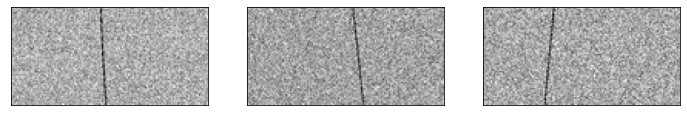

In [11]:
plt.figure(0, figsize=(12,12))
for i in range(1,4):
  plt.subplot(1,3,i)
  img = np.squeeze(x_train[np.random.randint(0, x_train.shape[0])])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap='gray')

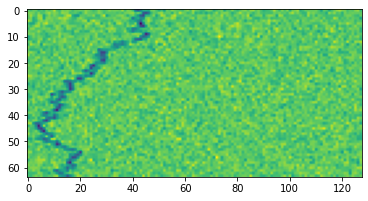

In [12]:
plt.imshow(np.squeeze(x_train[5]))

## Task 4: Create Training and Validation Data Generators

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image augmentation

datagen_train = ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_val)

## Task 5: Creating the CNN Model

In [14]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint

In [15]:
# Initialising the CNN
model = Sequential()
# 1st Convolution
model.add(Input(shape=(64,128,1)))
model.add(Conv2D(32,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4,activation='softmax'))

## Task 6: Learning Rate Scheduling and Compile the Model

In [16]:
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps = 5,
    decay_rate = 0.96,
    staircase=True
)

opt = Adam(learning_rate=lr_schedule)

In [17]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 32)       128       
_________________________________________________________________
activation (Activation)      (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 64, 64)        2

## Task 7: Training the Model

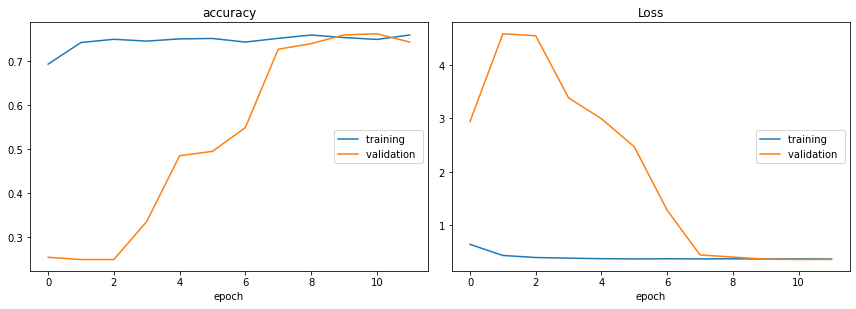

accuracy
	training         	 (min:    0.692, max:    0.758, cur:    0.758)
	validation       	 (min:    0.250, max:    0.761, cur:    0.743)
Loss
	training         	 (min:    0.370, max:    0.644, cur:    0.370)
	validation       	 (min:    0.361, max:    4.584, cur:    0.362)
100/100 [==============================] - 5s 54ms/step - loss: 0.3700 - accuracy: 0.7584 - val_loss: 0.3616 - val_accuracy: 0.7425


In [18]:
checkpoint = ModelCheckpoint('model_weights.h5',monitor='val_loss',
                             save_weights_only=True, mode='min',verbose=0)
callbacks = [PlotLossesCallback(), checkpoint]

batch_size = 32

history = model.fit(
    datagen_train.flow(x_train,y_train, batch_size=batch_size,shuffle=True),
    steps_per_epoch = len(x_train) // batch_size,
    validation_data = datagen_val.flow(x_val,y_val,batch_size=batch_size,shuffle=True),
    validation_steps = len(x_val) // batch_size,
    epochs = 12,
    callbacks=callbacks
)

## Task 8: Model Evaluation

In [19]:
model.evaluate(x_val,y_val)

25/25 [==============================] - 0s 11ms/step - loss: 0.3612 - accuracy: 0.7525


[0.3612484037876129, 0.7524999976158142]

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val,1)
y_pred = np.argmax(model.predict(x_val),1)
print(metrics.classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       200
           1       0.51      0.68      0.58       200
           2       0.51      0.34      0.41       200
           3       1.00      1.00      1.00       200

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



In [21]:
print('Classification accuracy: %0.6f' %metrics.accuracy_score(y_true,y_pred))

Classification accuracy: 0.752500


In [22]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]
